# **Ερώτημα Α**

**Στην γλώσσα προγραμματισμού της αρεσκείας σας να υλοποιηθούν συναρτήσεις που θα δίνουν την τιμή της**

**1. Συνάρτησης διάκρισης για δεδομένη κατανομή Ν(μ,Σ) d διαστάσεων και εκ των πρωτέρων πιθανότητας Ρ(ωi)**

**2. Ευκλείδειας απόστασης μεταξύ δύο αυθαίρετων σημείων x1 και x2 στον χώρο των d διαστάσεων**

**3. Απόστασης Mahalanobis μεταξύ του μέσου μ και ενός αυθαίρετου σημείου x στον χώρο των d διαστάσεων δεδομένου του πίνακα συνδυασποράς Σ**


Το παρόν ερώτημα υλοποιείται αποκλειστικά με κώδικα. Συγκεκριμένα επιλέχτηκε η γλώσσα Python και οι κώδικες βρίσκονται σε αρχείο με αντίστοιχο όνομα.

Έστω ότι οι περιοχές απόφασης είναι παρακείμενες. Τότε αυτές χωρίζονται από μία επιφάνεια απόφασης στον πολυδιάστατο χώρο των στατιστικών. Μερικές φορές, αντί να δουλεύουμε με πιθανότητες είναι πιο βολικό να εργαζόμαστε με ισοδύναμη συνάρτηση η οποία καλείται συνάρτηση διάκρισης (discrimination function).

Σύμφωνα με την εκφώνηση, ο τύπος της συνάρτησης αυτής είναι:

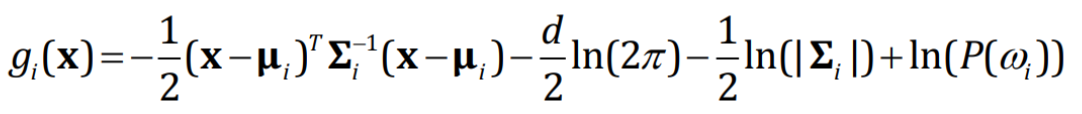

Η υλοποίησή της γίνεται με το ακόλουθο κομμάτι κώδικα:

In [56]:
import numpy as np
from math import pi, log

def DiscriminationFunction(d, x, m, sigma, prior):
    x_m = x - m

    if d>1:
        Det_sigma = abs(np.linalg.det(sigma))
        inv_sigma = np.linalg.inv(sigma)
        g = -0.5 * (x_m.T).dot(inv_sigma).dot(x_m) - (d/2) * np.log(2*pi) - 0.5 * np.log(Det_sigma) + np.log(prior)
    else:
        inv_sigma = sigma**-1
        g = -0.5 * x_m * inv_sigma * x_m - (d/2)*log(2*pi) - 0.5*log(abs(sigma)) + np.log(prior)
    return g


Εφόσον η NumPy υπολογίζει αντίστροφους και ανάστροφους πίνακες για τουλάχιστον διδιάστατους πίνακες, γίνεται διάκριση ανάλογα την τιμή της μεταβλητής d. Το πρόβλημα εντοπίζεται στις συναρτήσεις np.det() και np.linalg.inv().

Η Ευκλείδεια απόσταση 2 τυχαίων διανυσμάτων δίνεται από τον τύπο:

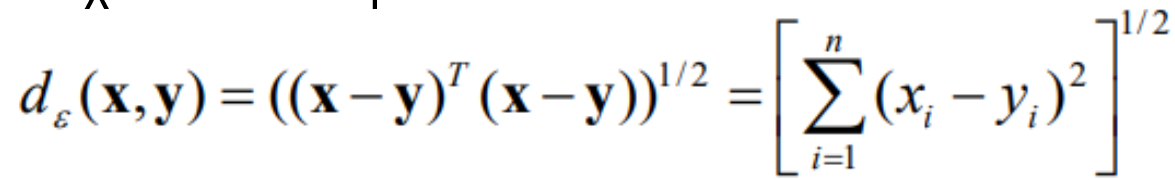

και το αντίστοιχο κομμάτι κώδικα είναι:


In [57]:
def EucleidianDistance(d, x1, x2):
    if d == 1:
        distanace = np.sqrt(np.sum((np.square(x1-x2))))
    else:
        distanace = np.sqrt(np.sum((np.square(x1-x2).T.dot(x1-x2) )))
    return distanace

Η Mahalanobis απόσταση 2 τυχαίων διανυσμάτων δίνεται από τον τύπο:

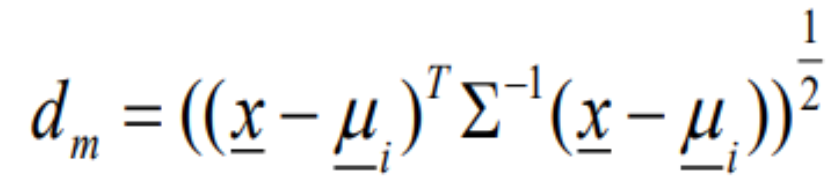

και το αντίστοιχο κομμάτι κώδικα είναι:


In [58]:
def ΜahalanobisDistanace(d, m, sigma, x):
    x_m = x - m
    if d>1:
        inv_sigma = np.linalg.inv(sigma)
        distance = np.sqrt(x_m.T.dot(inv_sigma).dot(x_m))
    else:
        inv_sigma = sigma**-1
        distance = np.sqrt(x_m*inv_sigma*x_m)
    return distance

# **Ερώτημα Β**

**Υποθέτοντας πως οι υποκείμενες κατανομές των κλάσεων είναι Gaussian, να εκτιμήσετε τις παραμέτρους τους με την μέθοδο της μέγιστης πιθανοφάνειας για τις περιπτώσεις που:**

**Β1: χρησιμοποιείται μονάχα το πρώτο χαρακτηριστικό (x1)**

**Β2: χρησιμοποιείται το πρώτο και το δεύτερο χαρακτηριστικό (x1 και x2)**

**B3: χρησιμοποιούνται όλα τα χαρακτηριστικά (x1, x2 και x3)**

Αρχικά, εισάγω το αρχείο data.csv και το επεξεργάζομαι ώστε να πάρω τις τιμές.

In [59]:
import pandas as pd

data = pd.read_csv('data.csv', usecols=[0,1,2])
c = np.transpose(pd.read_csv('data.csv', usecols=[3]).values)
df = np.transpose(data.values)

Σε πολλά προβλήματα οι συναρτήσεις πυκνότητας πιθανότητας δεν είναι γνωστές, άρα πρέπει να εκτιμηθούν από τα διαθέσιμα δεδομένα. Ανάλογα με τη διαθέσιμη πληροφορία υιοθετείται η κατάλληλη προσέγγιση.

Μία από τις σημαντικότερες είναι η εκτίμηση παραμέτρων με τη μέθοδο της μέγιστης πιθανοφάνειας. Γνωρίζοντας τα χαρακτηριστικά κάθε κλάσης, επιδιώκουμε να εκτιμήσουμε τις άγνωστες παραμέτρους. Θεωρούμε ότι οι κατανομές των κλάσεων είναι ανεξάρτητες, δηλαδή τα δεδομένα της μίας κλάσης δεν επηρεάζουν τα δεδομένα της άλλης. Έτσι, η μέθοδος αυτή εκτιμά τις παραμέτρους των κατανομών ώστε η συνάρτηση πιθανοφάνειας να λάβει την μέγιστη τιμή. Ο υπολογισμός των παραμέτρων της συνάρτησης πιθανοφάνειας γίνεται με τον ακόλουθο κώδικα.


In [60]:
def maximum_likelihood_estimation(data):
    mean = np.mean(data, axis=0)
    covariance_matrix = np.cov(data, rowvar=False)
    return mean, covariance_matrix

**Ερώτημα Β1: χρήση μόνο πρώτου χαρακτηριστικού x1**

Αρχικά, χωρίζω τα δεδομένα σε κλάσεις σύμφωνα με την τελευταία στήλη του αρχείου. Εφόσον γνωρίζω ότι έχω τρεις κλάσεις, δημιουργώ μία λίστα η οποία περιέχει τρεις λίστες, σε κάθε μία θα αποθηκεύονται και τα αντίστοιχα δεδομένα του προβλήματος.

Στο πρώτο ερώτημα ο υπολογισμός των παραμέτρων γίνεται μονάχα με βάση το πρώτο χαρακτηριστικό, οπότε αυτό μονάχα αποθηκεύω και στην εκάστοτε λίστα.

Στην συνέχεια, περνάω τα δεδομένα κάθε κλάσης ως ορίσματα στην επάνω συνάρτηση ώστε να υπολογιστούν οι παράμετροι των εκάστοτε κατανομών.


In [61]:
classes_x1 = [ [], [], []]

for i in range(len(df[0])):
  if c[0][i] == 1:
    classes_x1[0].append([df[0][i]])
  elif c[0][i] == 2:
    classes_x1[1].append([df[0][i]])
  else:
    classes_x1[2].append([df[0][i]])

for i in range (0,len(classes_x1)):
  m, s = maximum_likelihood_estimation(classes_x1[i])
  print("Kλάση "+str(i+1)+": μ = "+str(round(m[0],4))+" \tκαι\tΣ = "+str(s))

Kλάση 1: μ = 0.9064 	και	Σ = 26.65228151147099
Kλάση 2: μ = -1.4842 	και	Σ = 38.952850705128206
Kλάση 3: μ = 3.6802 	και	Σ = 9.45306743902439


**Ερώτημα Β2: χρήση πρώτου και δεύτερου χαρακτηριστικού x1 και x2**

Επαναλαμβάνω την ίδια διαδικασία όμως αυτήν την φορά αποθηκεύω σε κάθε κλάση τα δύο πρώτα χαρακτηριστικά x1 και x2.

In [62]:
classes_x1x2 = [ [], [], []]

for i in range(len(df[0])):
  if c[0][i] == 1:
    classes_x1x2[0].append([df[0][i], df[1][i]])
  elif c[0][i] == 2:
    classes_x1x2[1].append([df[0][i], df[1][i]])
  else:
    classes_x1x2[2].append([df[0][i], df[1][i]])


for i in range (0,len(classes_x1x2)):
  m, s = maximum_likelihood_estimation(classes_x1x2[i])
  print("Kλάση "+str(i+1)+": μ = "+str(np.round(m,4))+" \tκαι\tΣ = "+str(np.round(s[0],4)))
  print("\t\t\t\t\t    "+str(np.round(s[1],4))+'\n')

Kλάση 1: μ = [ 0.9064 -1.0449] 	και	Σ = [26.6523 15.8237]
					    [15.8237 18.3887]

Kλάση 2: μ = [-1.4842 -1.1483] 	και	Σ = [38.9529  7.97  ]
					    [ 7.97  11.408]

Kλάση 3: μ = [3.6802 1.2444] 	και	Σ = [9.4531 6.3758]
					    [6.3758 6.8551]



**Ερώτημα Β3: χρήση όλων των χαρακτηριστικών x1, x2 και x3**

Επαναλαμβάνω την ίδια διαδικασία όμως αυτήν την φορά αποθηκεύω σε κάθε κλάση όλα τα χαρακτηριστικά x1, x2 και x3.

In [63]:
classes_x1x2x3 = [ [], [], []]

for i in range(len(df[0])):
  if c[0][i] == 1:
    classes_x1x2x3[0].append([df[0][i], df[1][i], df[2][i]])
  elif c[0][i] == 2:
    classes_x1x2x3[1].append([df[0][i], df[1][i], df[2][i]])
  else:
    classes_x1x2x3[2].append([df[0][i], df[1][i], df[2][i]])

for i in range (0,len(classes_x1x2x3)):
  m, s = maximum_likelihood_estimation(classes_x1x2x3[i])
  print("Kλάση "+str(i+1)+": μ = "+str(np.round(m,4))+" \tκαι\tΣ = "+str(np.round(s[0],4)))
  print("\t\t\t\t\t\t    "+str(np.round(s[1],4)))
  print("\t\t\t\t\t\t    "+str(np.round(s[2],4))+"\n")

del data, df

Kλάση 1: μ = [ 0.9064 -1.0449 -0.3618] 	και	Σ = [26.6523 15.8237  4.6556]
						    [15.8237 18.3887 -0.8336]
						    [ 4.6556 -0.8336 20.7802]

Kλάση 2: μ = [-1.4842 -1.1483 -1.0092] 	και	Σ = [ 38.9529   7.97   -18.8435]
						    [ 7.97   11.408   0.4259]
						    [-18.8435   0.4259  19.7095]

Kλάση 3: μ = [3.6802 1.2444 1.0561] 	και	Σ = [9.4531 6.3758 9.4663]
						    [6.3758 6.8551 5.7652]
						    [ 9.4663  5.7652 40.6077]



# **Ερώτημα Γ**



**Επιλέξτε τον κατάλληλο ταξινομητή και δικαιολογείστε την απάντησή σας.**

Ας αναλύσουμε τον κάθε ταξινομητή ξεχωριστά:

**--> Ταξινομητής με Ευκλείδεια απόσταση**

Ο ταξινομητής αυτός ενδείκνυται για περιπτώσεις που πληρούνται τα ακόλουθα κριτήρια:

1. Οι κλάσεις είναι ισοπίθανες
2. Τα δεδομένα όλων των κλάσεων ακολουθούν γκαουσιανή κατανομή
3. Ο πίνακας συνδιασποράς Σ είναι:
      * ίδιος για όλες τις κλάσεις,
      * διαγώνιος
      * τα απέναντι στοιχεία της διαγωνίου είναι ίσα.

Από αυτά, δεν ικανοποιείται η τρίτη συνθήκη, οπότε δεν είναι ο κατάλληλος ταξινομητής μου.

Η ταξινόμηση βασίζεται στην απόσταση του διανύσματος του χαρακτηριστικού από εκείνου του μέσου μ.


**--> Ταξινομητής με Mahalanobis Απόσταση**
Ο ταξινομητής αυτός ενδείκνυται για περιπτώσεις που πληρούνται τα ακόλουθα κριτήρια:

1. Οι κλάσεις είναι ισοπίθανες
2. Τα δεδομένα όλων των κλάσεων ακολουθούν γκαουσιανή κατανομή
3. Ο πίνακας συνδιασποράς Σ είναι ίδιος για όλες τις κλάσεις

Από αυτά, δεν ικανοποιείται πάλι η τρίτη συνθήκη, οπότε δεν είναι ο κατάλληλος ταξινομητής μου.

Η ταξινόμηση βασίζεται στην απόσταση του διανύσματος του χαρακτηριστικού από εκείνου του μέσου, καθώς στον πίνακα συνδυασποράς.

**--> Ταξινομητής με την δοθείσα συνάρτηση διάκρισης**

Για τον ταξινομητή αυτό δεν δίνονται ενδεικτικές περιπτώσεις χρήσης.

Η ταξινόμηση βασίζεται στην απόσταση του διανύσματος του χαρακτηριστικού από εκείνου του μέσου, στον πίνακα συνδυασποράς και την a priori πιθανότητα της εκάστοτε κλάσης.

Συνεπώς, ο ταξινομητής αυτός θεωρείται ο πλέον κατάλληλος.

Σημειώνεται ότι η συνθήκη των ισοπίθανων κλάσεων ικανοπoιείται σαφώς μονάχα για τα ερωτήματα που δεν λαμβάνω υπόψην την τρίτη κλάση, δηλαδή για τα ερωτήματα Γ και Δ.

** **κείμενο με έντονη γραφή**Να προσδιοριστεί υπολογιστικά το εμπειρικό σφάλμα ταξινόμησης, δηλαδή το ποσοστό των σημείων που ταξινομούνται εσφαλμένα, υποθέτοντας ότι οι a priori πιθανότητες είναι Ρ(ω1) = Ρ(ω2) = 0.5 κάνοντας χρήση μονάχα του πρώτου χαρακτηριστικού.**

Εφόσον Ρ(ω1) = Ρ(ω2) = 0.5, θεωρώ ότι δεν υπάρχει η τρίτη κλάση καθώς, σύμφωνα με θεωρία, το άθροισμα των a priori πιθανοτήτων των συνολικών καταστάσεων της φύσης για ένα πρόβλημα ισούται με την μονάδα. Για αυτό, αφαιρώ από την μεταβλητή classes, το τελευταίο στοιχείο.

Ένα δείγμα ταξινομείται στην κλάση για την οποία προκύπτει η μεγαλύτερη τιμή της συνάρτησης διάκρισης. Το σφάλμα προκύπτει αν ένα δείγμα δεν ταξινομηθεί στην κλάση στην οποία ανήκει. Για παράδειγμα, εάν ένα δείγμα x παρουσιάσει μέγιστη τιμή της συνάρτησης ταξινόμησης g για την κλάση ω2, θα ταξινομηθεί σε αυήν. Εάν όμως ανήκει στην ω1 θεωρείται σφάλμα.

In [64]:
def classifier(d, classes, priors):
    m_x = []  # Need to keep these values in order to calculate the discrimination function below
    s_x = []
    wrong = 0

    for y in range(0, len(classes)):
        m, s = maximum_likelihood_estimation(classes[y])
        m_x.append(m)
        s_x.append(s.tolist())

    for cc in range(0, len(classes)):     # for every class
        a = wrong
        for i in range(len(classes[cc])): # for each element in one class
            # Wrong classification for features belonging to classI --> Occurs when gI is not maximum
            # Theodoridis p.23
            g = []
            for y in range(0, len(classes)): # Ν_classses = N_gi
                # Calculating the g of an element for every class
                # The element belongs to the class with the maximum gi
                gi = DiscriminationFunction(d, classes[cc][i], m_x[y], s_x[y], priors[y])
                g.append(gi)

            if max(g) != g[cc]:
                wrong += 1
        print("\tClassification errors in class ω" + str(cc+1) + ": " + str(wrong-a))

    total = sum(len(v) for v in classes)
    print("\tTotal samples are:"+str(total))
    # return round(wrong / total, 3)
    return wrong / total

In [65]:
priors = [0.5 , 0.5]
classes_x1c = classes_x1.copy()
classes_x1c.pop()  # Deleting third class ω3

error_1 = classifier(1, classes_x1c, priors)
print("Classification error using only feature x1: "+str(error_1))
# del classes_x1c

	Classification errors in class ω1: 10
	Classification errors in class ω2: 22
	Total samples are:79
Classification error using only feature x1: 0.4050632911392405


# **Ερώτημα Δ**



**Ερώτημα Δ1: Επαναλάβετε το προηγούμενο βήμα χρησιμοποιώντας τα πρώτα δύο χαρακτηριστικά (x1 και x2).**

Σαφώς, ακολουθώ την παρόμοια μεθοδολογία με εκείνη των δύο προηγούμενων ερωτημάτων.


In [66]:
classes_x1x2d = classes_x1x2.copy()
classes_x1x2d.pop() # Deleting third class ω3

error_2 = classifier(2, classes_x1x2d, priors)
print("Classification error using only features x1 and x2: "+str(error_2))
# del classes_x1x2d

	Classification errors in class ω1: 8
	Classification errors in class ω2: 22
	Total samples are:79
Classification error using only features x1 and x2: 0.379746835443038


**Ερώτημα Δ2: Επαναλάβετε το προηγούμενο βήμα χρησιμοποιώντας όλα τα χαρακτηριστικά (x1, x2, x3).**

Σαφώς, ακολουθώ παρόμοια μεθοδολογία με εκείνη των δύο προηγούμενων ερωτημάτων.

Όπως έχει ήδη αναφερθεί, η κλάση στην οποία ανήκει κάθε δείγμα πρέπει να εμφανίζει την μέγιστη τιμή για το g.


In [67]:
classes_x1x2x3d = classes_x1x2x3.copy()
classes_x1x2x3d.pop()   # Deleting third class ω3

error_3 = classifier(3, classes_x1x2x3d, priors)
print("Classification error using all features x1, x2 and x3: " + str(error_3))
# del classes_x1x2x3d

	Classification errors in class ω1: 11
	Classification errors in class ω2: 6
	Total samples are:79
Classification error using all features x1, x2 and x3: 0.21518987341772153


**Ερώτημα Δ3: Σχολιάστε τα αποτελέσματά σας και ιδιαίτερα την σχέση του εμπειρικού σφάλματος με τις διαστάσεις του προβλήματος.**

Σύμφωνα με τα παραπάνω αποτελέσματα, είναι φανερό πως η αύξηση του πλήθους των χαρακτηριστικών οδηγεί σε μικρότερο σφάλμα ταξινόμησης. Αυξάνοντας τις διαστάσεις παίρνουμε επιπλέον πληροφορία για κάθε κλάση η οποία είναι δυνατό να μας βοηθήσει στην ταξινόμηση. Ωστόσο, αν η πληροφορία αυτή δεν βοηθάει στην ταξινόμηση, δηλαδή λειτουργεί σαν θόρυβος, είναι πιθανό να αυξηθεί το σφάλμα μας. Η αύξηση των διαστάσεων δεν ισοδυναμεί πάντα με μείωση του ολικού σφάλματος, αυτό εξαρτάται από το εάν τα επιπρόσθετα χαρακτηριστικά εξυπηρετούν την ταξινόμηση.


Επιπλέον, σημειώνεται ότι η αύξηση των διαστάσεων ενδέχεται να χειροτερέψει τα αποτελέσματα της εκτίμησης των παραμέτρων, εάν παράλληλα δεν αυξηθεί και το πλήθος των δειγμάτων. Το πρόβλημα αυτό είναι γνωστό ως Curse of Dimentionality: εάν για μία μονοδιάσταση (d = 1) pdf απαιτούνται Ν δείγματα για να εκτιμηθούν καλά οι παράμετροι, τότε για περισσότερες διαστάσεις (d>1) απαιτούνται Ν^d δείγματα.

# **Ερώτημα Ε**

**Επαναλάβετε την εκτίμηση σφάλματος χρησιμοποιώντας όλα τα χαρακτηριστικά και γνωρίζοντας ότι Ρ(ω1) = 0.8 και Ρ(ω2) = Ρ(ω3) = 0.1**

Πλέον, έχω και τις τρεις κλάσεις οπότε δεν χρειάζεται να αφαιρέσω το τελευταίο στοιχείο της λίστας classes.

In [68]:
priors = [0.8, 0.1, 0.1]

error_4 = classifier(3, classes_x1x2x3, priors)
print("Classification error using all features x1, x2 and x3: " + str(error_4))

	Classification errors in class ω1: 0
	Classification errors in class ω2: 30
	Classification errors in class ω3: 36
	Total samples are:120
Classification error using all features x1, x2 and x3: 0.55


Συγκεντρωτικά, τα αποτελέσματα των ερωτημάτων είναι:

In [69]:
priors = [0.5, 0.5]
print("---- Only two classes ----")
error_1 = classifier(1, classes_x1c, priors)
print("Classification error using only feature x1: "+str(error_1)+"\n")

error_2 = classifier(2, classes_x1x2d, priors)
print("Classification error using only features x1 and x2: "+str(error_2)+"\n")

error_3 = classifier(3, classes_x1x2x3d, priors)
print("Classification error using all features x1, x2 and x3: " + str(error_3)+"\n")

priors = [0.8, 0.1, 0.1]
print("---- All classes ----")
error_4 = classifier(3, classes_x1x2x3, priors)
print("Classification error using all features x1, x2 and x3: " + str(error_4)+"\n")

---- Only two classes ----
	Classification errors in class ω1: 10
	Classification errors in class ω2: 22
	Total samples are:79
Classification error using only feature x1: 0.4050632911392405

	Classification errors in class ω1: 8
	Classification errors in class ω2: 22
	Total samples are:79
Classification error using only features x1 and x2: 0.379746835443038

	Classification errors in class ω1: 11
	Classification errors in class ω2: 6
	Total samples are:79
Classification error using all features x1, x2 and x3: 0.21518987341772153

---- All classes ----
	Classification errors in class ω1: 0
	Classification errors in class ω2: 30
	Classification errors in class ω3: 36
	Total samples are:120
Classification error using all features x1, x2 and x3: 0.55

